<h1 style="text-align:center;"><FONT COLOR="purple"> DATA CLEANING AND OUTLIER DETECTION <h1>

<h4><FONT COLOR="violet">IMPORTING NECESSARY LIBRARIES<h4>

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
orders=pd.read_csv('order_details.csv')                                  # Converting dataset to dataframe object

In [253]:
orders.head(10)                                            #1st 10 records

,Order ID,Customer ID,Product ID,Product Category,Order Date,Quantity,Unit Price,Order Value
0,978e028b-41ec-4013-9500-4317784c3b3d,04e83bbd-1458-4ada-b9eb-ce8bba1677fa,558e66e0-047e-4810-8200-a5cddc8c7c57,Pineapple,22-04-2023,10,50.69,506.94
1,978e028b-41ec-4013-9500-4317784c3b3d,04e83bbd-1458-4ada-b9eb-ce8bba1677fa,42098466-082c-4bc6-b625-2555f9505137,Cabbage,22-04-2023,3,318.10,954.30
2,978e028b-41ec-4013-9500-4317784c3b3d,04e83bbd-1458-4ada-b9eb-ce8bba1677fa,386278be-20f5-48ea-8a05-f1cdd64cf5b0,Strawberry,22-04-2023,1,917.65,917.65
3,978e028b-41ec-4013-9500-4317784c3b3d,04e83bbd-1458-4ada-b9eb-ce8bba1677fa,d36d024f-3149-4494-af58-cc0b8df52a92,Mango,22-04-2023,9,26.73,240.55
4,978e028b-41ec-4013-9500-4317784c3b3d,04e83bbd-1458-4ada-b9eb-ce8bba1677fa,c4cf5b93-682a-433e-b5b5-06728d594cf3,Garlic,22-04-2023,9,96.00,863.97
5,978e028b-41ec-4013-9500-4317784c3b3d,04e83bbd-1458-4ada-b9eb-ce8bba1677fa,87640580-0fd9-43bc-a493-33192f4162c5,Watermelon,22-04-2023,2,6.53,13.06
6,c1df33ef-fb5d-4c4d-9bfd-7e39e049cac0,5a02dddd-0b90-4daa-9e77-c1507e3dc46d,d36d024f-3149-4494-af58-cc0b8df52a92,Mango,07-03-2023,8,42.78,342.25
7,c1df33ef-fb5d-4c4d-9bfd-7e39e049cac0,5a02dddd-0b90-4daa-9e77-c1507e3dc46d,771faf3e-ec95-4b2d-be2a-4f336bab097e,Spinach,07-03-2023,4,7.63,30.54
8,c1df33ef-fb5d-4c4d-9bfd-7e39e049cac0,5a02dddd-0b90-4daa-9e77-c1507e3dc46d,0deaf92e-e104-4410-87b6-3194eb20b5cb,Grapes,07-03-2023,4,151.53,606.11
9,c1df33ef-fb5d-4c4d-9bfd-7e39e049cac0,5a02dddd-0b90-4daa-9e77-c1507e3dc46d,c4cf5b93-682a-433e-b5b5-06728d594cf3,Garlic,07-03-2023,1,802.47,802.47


In [254]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18024 entries, 0 to 18023
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18024 non-null  object 
 1   Customer ID       18024 non-null  object 
 2   Product ID        18024 non-null  object 
 3   Product Category  18024 non-null  object 
 4   Order Date        18024 non-null  object 
 5   Quantity          18024 non-null  int64  
 6   Unit Price        18024 non-null  float64
 7   Order Value       18024 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.1+ MB


In [255]:
orders.shape                                                   #Shape of the order in rows and columns

(18024, 8)

In [256]:
orders.isnull().sum()                                          # No missing values detected

Order ID            0
Customer ID         0
Product ID          0
Product Category    0
Order Date          0
Quantity            0
Unit Price          0
Order Value         0
dtype: int64

<h4><FONT COLOR="violet">OUTLIERS DETECTION<h4>

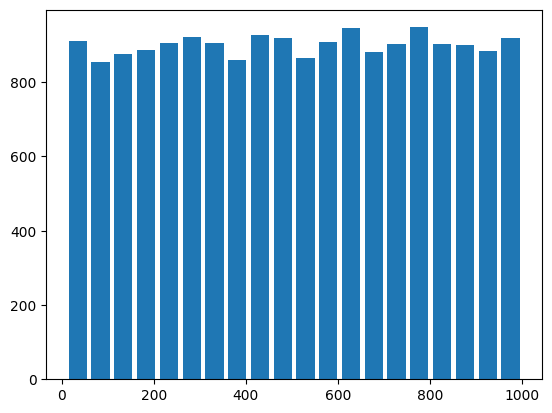

In [257]:
plt.hist(orders['Order Value'], bins=20, rwidth=0.8)
plt.show()

<FONT COLOR="Blue"> Data is distributed uniformly i.e no skewness

In [258]:
k=orders['Order Value'].min()
k

10.01

In [259]:
z=orders['Order Value'].max()
z

999.99

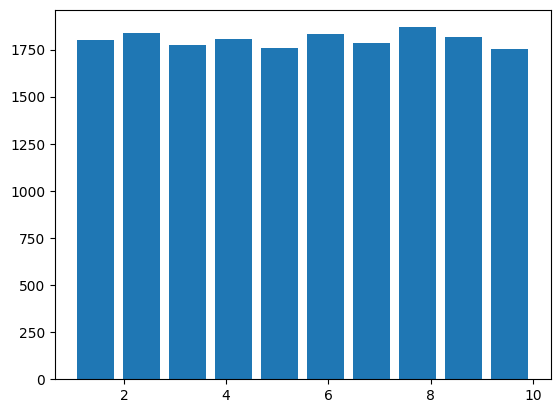

In [260]:
plt.hist(orders['Quantity'], bins=10, rwidth=0.8)
plt.show()

<FONT COLOR="Blue"> Data is distributed uniformly i.e no skewness

In [261]:
k=orders['Quantity'].min()
k

1

In [262]:
z=orders['Quantity'].max()
z

10

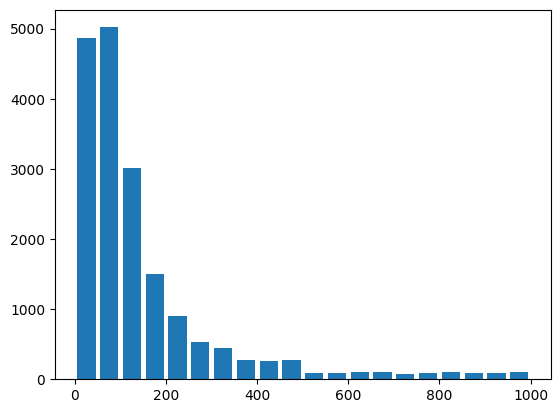

In [263]:
plt.hist(orders['Unit Price'], bins=20, rwidth=0.8)
plt.show()

<FONT COLOR="Blue"> Data is positively / right skewed and the histogram is Leptokurtic in nature. There exists outliers at the tail of the data

In [264]:
k=orders['Unit Price'].min()
k

1.04

In [265]:
z=orders['Unit Price'].max()
z

999.99

In [266]:
l=orders['Unit Price']
l.describe()                           # Describing the data

count    18024.000000
mean       148.302343
std        174.310884
min          1.040000
25%         47.547500
50%         92.305000
75%        166.287500
max        999.990000
Name: Unit Price, dtype: float64

In [267]:
l.mean()

148.30234298712827

In [268]:
l.std()

174.310883725107

<h4><FONT COLOR="violet"> OUTLIER REMOVAL</h4>

In [269]:
Q1=l.quantile(0.25)
Q3=l.quantile(0.75)

In [270]:
Q1,Q3

(47.5475, 166.2875)

In [271]:
IQR=Q3-Q1

In [272]:
IQR

118.74

In [273]:
lower_limit=Q1-1.5*IQR
upper_limit=Q1+1.5*IQR

In [274]:
lower_limit,upper_limit

(-130.5625, 225.65749999999997)

In [275]:
orders_no_outliers=orders[(l>lower_limit) & (l<upper_limit)]

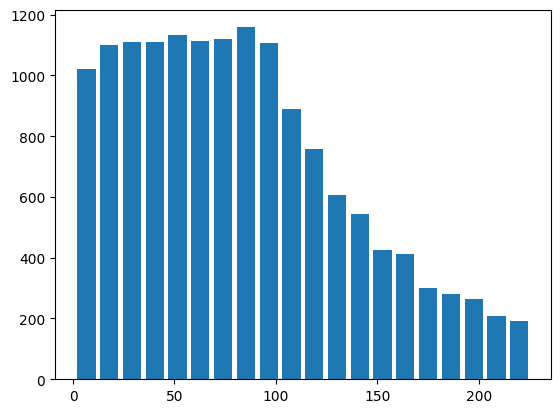

In [229]:
plt.hist(orders_no_outliers['Unit Price'], bins=20, rwidth=0.8)
plt.show()                                                        # Very Low outliers, skewness changed a lot

<FONT COLOR="Blue"> Although the data is still positively skewed , the number of ouliers has been reduced to minimal

In [278]:
orders_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14850 entries, 0 to 18023
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          14850 non-null  object 
 1   Customer ID       14850 non-null  object 
 2   Product ID        14850 non-null  object 
 3   Product Category  14850 non-null  object 
 4   Order Date        14850 non-null  object 
 5   Quantity          14850 non-null  int64  
 6   Unit Price        14850 non-null  float64
 7   Order Value       14850 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.0+ MB


In [279]:
orders_no_outliers.tail(10)

,Order ID,Customer ID,Product ID,Product Category,Order Date,Quantity,Unit Price,Order Value
18012,8fee7e9b-1d26-46a4-8d32-545798ec6867,d8cd3e50-d5ed-419f-ba36-7cefa9d2d9ea,87640580-0fd9-43bc-a493-33192f4162c5,Watermelon,27-07-2023,10,34.70,346.99
18013,cad174b4-16ea-4595-95e5-90b00c061cf5,98803c43-26f7-457b-8e0a-135db3e03671,d36d024f-3149-4494-af58-cc0b8df52a92,Mango,28-04-2023,8,115.81,926.52
18014,cad174b4-16ea-4595-95e5-90b00c061cf5,98803c43-26f7-457b-8e0a-135db3e03671,558e66e0-047e-4810-8200-a5cddc8c7c57,Pineapple,28-04-2023,3,15.31,45.92
18015,cad174b4-16ea-4595-95e5-90b00c061cf5,98803c43-26f7-457b-8e0a-135db3e03671,fb79e97e-6dc6-48fb-a4d7-58b87f37692b,Apple,28-04-2023,8,83.17,665.32
18016,cad174b4-16ea-4595-95e5-90b00c061cf5,98803c43-26f7-457b-8e0a-135db3e03671,03b62fc9-9900-451b-bfb6-01b67c3ec167,Lentils,28-04-2023,3,168.76,506.27
18017,d13670a6-4d87-43dc-b7af-71ebf3299442,145204d5-79ed-4fe8-bee1-af5dad670898,558e66e0-047e-4810-8200-a5cddc8c7c57,Pineapple,02-03-2023,4,114.66,458.64
18019,d13670a6-4d87-43dc-b7af-71ebf3299442,145204d5-79ed-4fe8-bee1-af5dad670898,f002424c-21d3-40d4-b223-9713d48f5e1e,Beans,02-03-2023,4,129.03,516.13
18020,d13670a6-4d87-43dc-b7af-71ebf3299442,145204d5-79ed-4fe8-bee1-af5dad670898,771faf3e-ec95-4b2d-be2a-4f336bab097e,Spinach,02-03-2023,4,215.63,862.54
18022,576e11d5-e2ee-441b-8ccc-5cc177a16d52,286215d5-be8f-4b05-bab8-b2d3bc8a0c34,f002424c-21d3-40d4-b223-9713d48f5e1e,Beans,20-05-2023,9,25.28,227.50
18023,576e11d5-e2ee-441b-8ccc-5cc177a16d52,286215d5-be8f-4b05-bab8-b2d3bc8a0c34,7676498c-893b-48dc-8b77-75c0bcf8787a,Carrot,20-05-2023,10,74.91,749.08


In [280]:
orders_no_outliers.shape

(14850, 8)

<h4><FONT COLOR="violet"> SAVING THE DATA IN CSV FORMAT </h4>

In [233]:
orders_no_outliers.to_csv(r'C:\Users\reitr\OneDrive\Documents\My Tableau Repository\Datasources\Wallmart\orders_low_outliers.csv')